<style>
#s {
}
h1, h2, h3, h4, h5, h6, table, button, a, p, blockquote {
font-family:Geneva;
}

.log {
transition: all .2s ease-in-out;
}

.log:hover {a
transform: scale(1.05);
}
</style>
<div id='s' style='width:100%'>
<center><img class='log' src='https://splicemachine.com/wp-content/uploads/splice-logo-1.png' width='20%' style='z-index:5'></center>
<center><h1 class='log' style='font-size:50px; color:black;'>Welcome to Splice Machine MLManager</h1></center>
<center><h2 class = 'log' style='font-size:25px; color:grey;'>The data platform for intelligent applications</center>
</div>

<style>
blockquote{
  font-size: 15px;
  background: #f9f9f9;
  border-left: 10px solid #ccc;
  margin: .5em 10px;
  padding: 30em, 10px;
  quotes: "\201C""\201D""\2018""\2019";
  padding: 10px 20px;
  line-height: 1.4;
}

blockquote:before {
  content: open-quote;
  display: inline;
  height: 0;
  line-height: 0;
  left: -10px;
  position: relative;
  top: 30px;
  bottom:30px;
  color: #ccc;
  font-size: 3em;
    display:none;

}

p{
  margin: 0;
}

footer{
  margin:0;
  text-align: right;
  font-size: 1em;
  font-style: italic;
}
</style>
<blockquote><p class='quotation'><b><br><span style='font-size:25px'>Why use Splice Machine ML</span></b><br><br>Splice Machine ML isn't just a machine learning platform, it is a complete machine learning lifecycle management solution, giving you total control of your models, from retrieving data to scalable deployment.  <br><br>
    <center><img class='log' src='https://s3.amazonaws.com/splice-demo/splice-machine-data-science-process.png' width='40%' style='z-index:5'></center>
    <br><ul><li>Our platform runs directly on Apache Spark, allowing you to complete massive jobs in parallel</li><li>Our native <code>PySpliceContext</code> lets you directly access the data in your database and convert as a Spark DataFrame, no ETL.</li><li><code>MLFlow</code> is integrated directly into all Splice Machine clusters, allowing you to keep track of your entire Data Science workflow</li><li>After you have found the best model for your task, you can easily deploy it live to AWS SageMaker or AzureML to make predictions in real time.</li><li>MLFlow does not force a standard workflow, instead it allows teams to develop their own methodology easily that fits their teams and problems</li></ul><br>In this demo we will guide you through the entire MLManager life cycle.<br></p><footer>Your friends at Splice Machine</footer></blockquote>

<h2 style='font-size:25px;  font-weight:bold'>How does this work?</h2>
<style>
blockquote{
  font-size: 15px;
  background: #f9f9f9;
  border-left: 10px solid #ccc;
  margin: .5em 10px;
  padding: 30em, 10px;
  quotes: "\201C""\201D""\2018""\2019";
  padding: 10px 20px;
  line-height: 1.4;
}

blockquote:before {
  content: open-quote;
  display: inline;
  height: 0;
  line-height: 0;
  left: -10px;
  position: relative;
  top: 30px;
  bottom:30px;
  color: #ccc;
  font-size: 3em;
    display:none;

}

p{
  margin: 0;
}

footer{
  margin:0;
  text-align: right;
  font-size: 1em;
  font-style: italic;
}
</style>
<blockquote><p class='quotation'><b><br><span style='font-size:25px'>Jupyter</span></b> <br><br>Jupyter notebooks are a simple, easy and intuitive way to do data science, directly in your browser. Any Spark computations you run inside of the notebook are executed right on your cluster's Spark executors.<br><br>Jupyter notebooks also make machine learning easier. By using Jupyter <i>magics</i>, you can run different languages inside the same notebook. The language you want to run is signified by a %% sign followed by a magic at the top of a cell. For example, one of the interpreters you will become very familiar with while using our platform <code>%%sql</code> magic. In the <code>%%sql</code> magic you can run standard SQL queries and visualize the results in Jupyter's built in visulaization tools.<br> <br><i>This entire demo was written inside a Jupyter notebook</i></br><footer>Splice Machine</footer></blockquote><br>
<blockquote><p class='quotation'><b><br><span style='font-size:25px'>MLFlow</span></b><br><br>As a data scientist constantly creating new models and testing new features, it is necessary to effectively track and manage those different ML runs. MLFlow allows you to track entire <code>experiments</code> and individual <code>run</code> parameters and metrics. The way you organize your flow is unique to you, and the intuitive Python API allows you to organize your delevopement process and run with it.<br>
     <center><img class='log' src='https://s3.amazonaws.com/splice-demo/mlflow+ui.png' width='40%' style='z-index:5'></center>

<br>
<center><h1 style='font-size:35px;'>Ready? Let's get started<b style='font-size:35px'>.</b></h1></center>

## Problem statement:
### Can we predict the likelihood of fraudulent transactions after training on historical actuals? 
#### We're going to find out using Splice Machine's <code>MLManager</code>
<br>

In [2]:
# !pip install seaborn statsmodels
from utils import *
hide_toggle()

In [9]:
!wget https://splice-releases.s3.amazonaws.com/jdbc-driver/db-client-2.7.0.1815.jar

--2019-12-04 04:08:26--  https://splice-releases.s3.amazonaws.com/jdbc-driver/db-client-2.7.0.1815.jar
Resolving splice-releases.s3.amazonaws.com (splice-releases.s3.amazonaws.com)... 52.217.42.148
Connecting to splice-releases.s3.amazonaws.com (splice-releases.s3.amazonaws.com)|52.217.42.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2490591 (2.4M) [binary/octet-stream]
Saving to: ‘db-client-2.7.0.1815.jar.2’

db-client-2.7.0.181 100%[===================>]   2.38M  12.4MB/s    in 0.2s    

2019-12-04 04:08:27 (12.4 MB/s) - ‘db-client-2.7.0.1815.jar.2’ saved [2490591/2490591]



In [10]:
%%sql
%classpath add jar db-client-2.7.0.1815.jar
%defaultDatasource jdbc:splice://host.docker.internal:1527/splicedb;user=splice;password=admin

In [15]:
%%sql

create schema cc_fraud;
set schema cc_fraud;
--drop table if exists cc_fraud.cc_fraud_data;
create table cc_fraud.cc_fraud_data (
    time_offset integer,
    v1 double,
    v2 double,
    v3 double,
    v4 double,
    v5 double,
    v6 double,
    v7 double,
    v8 double,
    v9 double,
    v10 double,
    v11 double,
    v12 double,
    v13 double,
    v14 double,
    v15 double,
    v16 double,
    v17 double,
    v18 double,
    v19 double,
    v20 double,
    v21 double,
    v22 double,
    v23 double,
    v24 double,
    v25 double,
    v26 double,
    v27 double,
    v28 double,
    amount decimal(10,2),
    class_result int
);

call SYSCS_UTIL.IMPORT_DATA (
     'cc_fraud',
     'cc_fraud_data',
     null,
     's3a://splice-demo/kaggle-fraud-data/creditcard.csv',
     ',',
     null,
     null,
     null,
     null,
     -1,
     's3a://splice-demo/kaggle-fraud-data/bad',
     null, 
     null);
     

In [16]:
%%sql
select top 10 * from cc_fraud.cc_fraud_data

In [17]:
%%sql
select class_result, count(*) from cc_fraud.cc_fraud_data group by class_result

In [18]:
%%sql
explain select class_result, count(*) from cc_fraud.cc_fraud_data group by class_result

<h1 style='font-size:30px;font-weight:bold'>Connecting to your database</h1><br>
<blockquote><p class='quotation'><b><br><span style='font-size:15px'>Now, let's establish a connection to your database using Python via our <a href="https://www.splicemachine.com/the-splice-machine-native-spark-datasource/">Native Spark Datasource</a>. We will use the <code>PySpliceContext</code> to establish our direct connection-- it allows us to do inserts, selects, upserts, updates and many more functions without serialization<footer>Splice Machine</footer></blockquote>

In [29]:
from pyspark.sql import SparkSession
# from splicemachine.spark.context import PySpliceContext
# Create our Spark Session
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
# Create out Native Database Connection
splice = PySpliceContext(spark)

### Let's create our <code>MLManager</code>
<blockquote><p class='quotation'><b><br><span style='font-size:20px'> When you create an MLManager object, a tracking URL is returned to you. There is one tracking URL _per cluster_ so if you create another one in a new notebook, it will return the same tracking URL. This is useful because you can create multiple different experiments across all notebooks, and all will be tracked in the MLFlow UI.

<footer>Splice Machine</footer></blockquote>

In [18]:
import os
os.environ['MLFLOW_URL'] = 'mlflow:5001'
hide_toggle()

In [71]:
from splicemachine.ml.management import MLManager
manager = MLManager(splice)

Tracking Model Metadata on MLFlow Server @ http://mlflow:5001


<h1 style='font-size:30px;font-weight:bold'>Loading The Data</h1><br>
<blockquote><p class='quotation'><b><br><span style='font-size:25px'>Data Loading</span></b><br><br>Loading data into Splice Machine couldn't be easier, no matter the source. Because we connect directly to our database source, there is no ETL necessary.<footer>Splice Machine</footer></blockquote>


### Let's import our data into a Spark DataFrame using our <code>PySpliceContext</code>
#### Now is also a good time to create our MLFlow <code>Experiment</code> which we will call fraud_demo


In [80]:
#create our MLFlow experiment
manager.create_experiment('fraud_demo')
df = splice.df("SELECT * FROM cc_fraud.cc_fraud_data")
df = df.withColumnRenamed('CLASS_RESULT', 'label')
display(df.limit(10).toPandas())

Experiment fraud_demo already exists... setting to active experiment
Active experiment has id 1


## We can now see our experiment in the MLFlow UI at port <code>5001</code>
<center><img class='log' src='https://s3.amazonaws.com/splice-demo/mlflow_UI_fraud.png' width='60%' style='z-index:5'></center>

## Data investigation
### Before going further, it's important to look at the correlations between all of your features and each other as well as the label
#### We can easily create a heatmap to compare all features against each other and the label

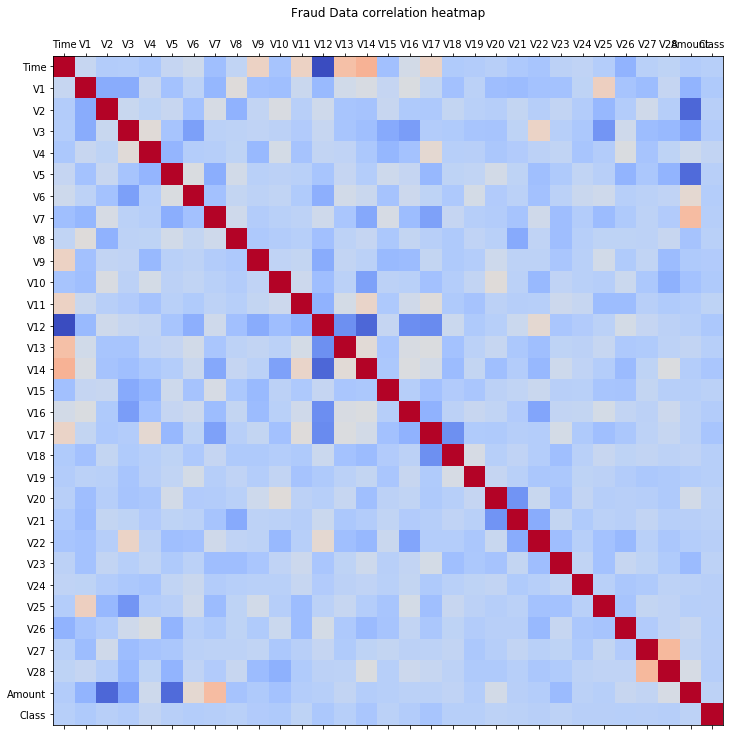

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for i in df.columns:
    df = df.withColumn(i,df[i].cast(FloatType()))

pdf = df.limit(5000).toPandas()
correlations = pdf.corr()
correlations.style.set_precision(2)

plt.rcParams["figure.figsize"] = (8,12)
plt.matshow(correlations, cmap='coolwarm')

ticks = [i for i in range(len(correlations.columns))]
plt.xticks(ticks, correlations.columns)
plt.yticks(ticks, correlations.columns)


plt.title('Fraud Data correlation heatmap')
plt.show()

# Ben's run
### Ben, our first Data Scientist, has an idea for the steps to build this model. He will create a <code>run</code> and log his name as to keep track of what he did
#### <code>manager.start_run()</code>
##### You can set <code>tags</code> to your run such as <code>team</code>, <code>purpose</code>, or anything you'd like to track your runs. You can also set a <code>run_name</code> as a parameter. 
###### The user_id will automatically be added as the user that is signed into this notebook (currently that's me, Ben)

### If you navigate to the mlflow port you will now see the fraud-demo experiment, but there is nothing in that experiment yet. Let's start our first <code>run</code> and track our progress

In [81]:
#start our first MLFlow run
tags = {
        'team': 'Clearsense',
        'purpose': 'fraud r&d',
        'attempt-date': '11/07/2019',
        'attempt-number': '1'
       }
manager.start_run(tags=tags)

## Let's look at some of the attributes of this dataset:
* Because we have so few fraud examples, we need to oversample our fraudulent transactions and undersample the non-fraud transactions
* We need to make sure the model isn't overfit and doesn't always predict non-fraud (due to the lack of fraud data) so we can't only rely on accuracy
* We want to pick a model that doesn't have a high overfitting rate

## Let's define our Pipeline

You can use Spark's <code>Pipeline</code> class to define a set of <code>Transformers</code> that set up your dataset for modeling<br>
We'll then use <code>MLManager</code> to <code>log</code> our Pipeline stages

In [79]:
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline,PipelineModel
from pyspark.ml.classification import RandomForestClassifier, MultilayerPerceptronClassifier

feature_cols = df.columns[:-1]
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
scaler = StandardScaler(inputCol="features", outputCol='scaledFeatures')
rf = RandomForestClassifier()

stages = [assembler,scaler,rf]
mlpipe = Pipeline(stages=stages)
manager.log_pipeline_stages(mlpipe)

## Model setup

Now we can set up our modeling process. We will use our <code>OverSampleCrossValidator</code> to properly oversample our dataset for model building.<br>
While we do that, we'll add just a few lines of code to track all of our moves in MLFlow

In [94]:
from utils1 import OverSampleCrossValidator as OSCV
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
import pandas as pd
import numpy as np

# Define evaluation metrics
PRevaluator = BinaryClassificationEvaluator(metricName = 'areaUnderPR') # Because this is a needle in haystack problem
AUCevaluator = BinaryClassificationEvaluator(metricName = 'areaUnderROC')
ACCevaluator = MulticlassClassificationEvaluator(metricName="accuracy")
f1evaluator = MulticlassClassificationEvaluator(metricName="f1")

# Define hyperparameters to try
params = {rf.maxDepth: [5,15], \
          rf.numTrees: [10,30], \
          rf.minInfoGain: [0.0,2.0]}

paramGrid_stages = ParamGridBuilder()
for param in params:
    paramGrid_stages.addGrid(param,params[param])    
paramGrid = paramGrid_stages.build()

# Create the CrossValidator
fraud_cv = OSCV(estimator=mlpipe,
                        estimatorParamMaps=paramGrid,
                        evaluator=PRevaluator,
                        numFolds=3,
                        label = 'label',
                        seed = 1234,
                        parallelism = 3,
                        altEvaluators = [ACCevaluator, f1evaluator, AUCevaluator])


## Run the CV

Now we can run the CrossValidator and log the results to MLFlow

In [ ]:
df = df.withColumnRenamed('Amount', 'label') 
manager.start_timer('with_oversample')
fraud_cv_model, alt_metrics = fraud_cv.fit(df)
execution_time = manager.log_and_stop_timer()

print(f"--- {execution_time} seconds == {execution_time/60} minutes == {execution_time/60/60} hours")


# Grab metrics of best model
best_avg_prauc = max(mycvModel.avgMetrics)
best_performing_model = np.argmax(fraud_cv_model.avgMetrics)

# metrics at the best performing model for this iteration 
best_avg_acc = [alt_metrics[i][0] for i in range(len(alt_metrics))][best_performing_model]
best_avg_f1 = [alt_metrics[i][1] for i in range(len(alt_metrics))][best_performing_model]
best_avg_rocauc = [alt_metrics[i][2] for i in range(len(alt_metrics))][best_performing_model]

print(f"The Best average (Area under PR) for this grid search: {best_avg_prauc}")
print(f"The Best average (Accuracy) for this grid search: {best_avg_acc}")
print(f"The Best average (F1) for this grid search: {best_avg_f1}")
print(f"The Best average (Area under ROC) for this grid search: {best_avg_rocauc}")

evals = [('areaUnderPR',best_avg_prauc), ('Accuracy',best_avg_acc),('F1',best_avg_f1),('areaUnderROC',best_avg_rocauc)]
manager.log_metrics(evals)
      
# Get the best parameters
bestParamsCombination = {}
for stage in fraud_cv_model.bestModel.stages:
    bestParams = stage.extractParamMap()
    for param in params:
        if param in bestParams:
            bestParamsCombination[param] = bestParams[param]

#log the hyperparams
manager.log_params(list(bestParamsCombination.items()))

print("Best Param Combination according to f1 is: \n")
print(pd.DataFrame([(str(i.name),str(bestParamsCombination[i]))for i in bestParamsCombination], columns = ['Param','Value']))

# Feature importance of the Principal comp
importances = fraud_cv_model.bestModel.stages[-1].featureImportances.toArray()
top_5_idx = np.argsort(importances)[-5:]
top_5_values = [importances[i] for i in top_5_idx]

top_5_features = [new_features[i] for i in top_5_idx]
print("___________________________________")
importances = fraud_cv_model.bestModel.stages[-1].featureImportances.toArray()

print("Most Important Features are")
print(pd.DataFrame(zip(top_5_features,top_5_values), columns = ['Feature','Importance']).sort_values('Importance',ascending=False))

      
#Log feature importances
manager.log_params()      

Started timer with_oversample at 1575435600.9854932


In [91]:
import utils1
import importlib
importlib.reload(utils1)

<module 'utils1' from '/opt/notebook/utils1.py'>

In [ ]:
import random
from utils1 import overSampler
from splicemachine.ml.utilities import SpliceBinaryClassificationEvaluator
rf_depth = [5,10,20,30]
rf_trees = [8,12,18,26]
rf_subsampling_rate = [1.0,0.9,0.8]
oversample_rate = [0.4,0.7,1.0]

for i in range(1,5):
    tags = {
        'team': 'Clearsense',
        'purpose': 'fraud r&d',
        'attempt-date': '11/07/2019',
        'attempt-number': 'f{i}'
       }
    manager.start_run(tags=tags)
    
    #random variable choice
    depth = random.choice(rf_depth)
    trees = random.choice(rf_trees)
    subsamp_rate = random.choice(rf_subsampling_rate)
    ovrsmpl_rate = random.choice(oversample_rate)
    
    #transformers
    feature_cols = df.columns[:-1]
    ovr = overSampler(label='label',ratio = ovrsmpl_rate, majorityLabel = 0, minorityLabel = 1, withReplacement = False)
    assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
    scaler = StandardScaler(inputCol="features", outputCol='scaledFeatures')
    rf = RandomForestClassifier(maxDepth=depth, numTrees=trees, subsamplingRate=subsamp_rate)
    
    #pipeline
    stages = [ovr,assembler,scaler,rf]
    mlpipe = Pipeline(stages=stages)
    #log the stages of the pipeline
    manager.log_pipeline_stages(mlpipe)
    #log what happens to each feature
    manager.log_feature_transformations(mlpipe)
    
    #run on the data
    train, test = df.randomSplit([0.8,0.2])
    manager.start_timer(f'CV iteration {i}')
    trainedModel = mlpipe.fit(train)
    execution_time = manager.log_and_stop_timer()
    print(f"--- {execution_time} seconds == {execution_time/60} minutes == {execution_time/60/60} hours")

    #log model parameters
    manager.log_model_params(trainedModel)
    preds = trainedModel.transform(test)
    #evaluate
    evaluator = SpliceBinaryClassificationEvaluator()
    evaluator.input(preds)
    metrics = evaluator.get_results(dict=True)
    #log model performance
    manager.log_metrics(list(metrics.items()))
    
    